In [1]:
# kyphosis - medical case
# individuals wth curved backbones

# medical industry
# data from hospital --> private
# doctor / hospital --> data from people who actually have used their services

target (column 0) --> predict whether the person has kyphosis or not
features (column 1 to 3) --> the other three parameters

For age, the unit is monthly

In [2]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Read dataset from GitHub
! git clone https://github.com/PrefaceCoding/M3L5

fatal: destination path 'M3L5' already exists and is not an empty directory.


In [4]:
# Read the first five rows of the csv data file
df = pd.read_csv("M3L5/kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
# Look at the distribution and basic statitic of the data
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


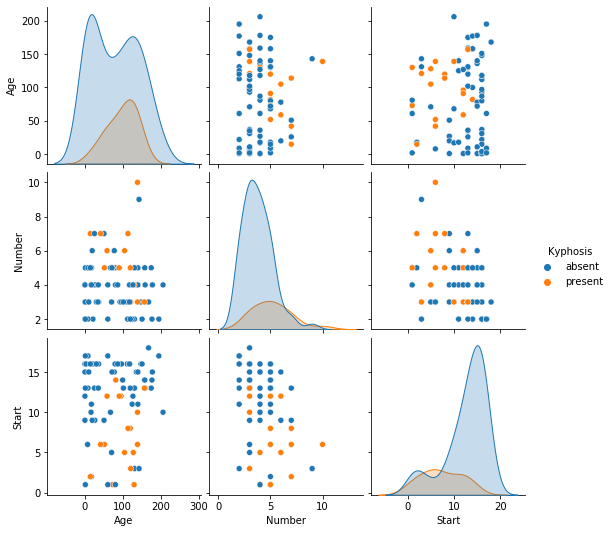

In [6]:
# Plot pairwise relationships in the dataset
# each variable in the data are shared by the same y-axis across a row and x-axis across a column
sns.pairplot(df, hue = 'Kyphosis')

In [7]:
# Change the monthly age to yearly
df["Age"]/=12
df.head()

,Kyphosis,Age,Number,Start
0,absent,5.916667,3,5
1,absent,13.166667,3,14
2,present,10.666667,4,5
3,absent,0.166667,5,1
4,absent,0.083333,4,15


In [8]:
# Get the features and the target
X = df.drop("Kyphosis", axis = 1)
y = df["Kyphosis"]

In [9]:
# step 1: data preparation 
# spliting into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

X_train.head()

,Age,Number,Start
74,0.916667,3,15
54,11.666667,4,15
1,13.166667,3,14
71,10.583333,4,12
45,11.583333,3,10


In [26]:
# step 2: model selction (Tree Based Model)
from sklearn.tree import DecisionTreeClassifier

# instantiate
dtree = DecisionTreeClassifier(criterion='gini')
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
# step 3: model training
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
# step 4: model prediction
y_pred = dtree.predict(X_test)
y_pred == y_test

33     True
61     True
21     True
32     True
20     True
13     True
52    False
25    False
22    False
27     True
30     True
2     False
67    False
16    False
69    False
6      True
53     True
14     True
48    False
46     True
26     True
50     True
3     False
37    False
79    False
Name: Kyphosis, dtype: bool

In [13]:
# step 5: evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)

confusion_matrix(y_test,y_pred)

y_test.value_counts(normalize=True)

print(classification_report(y_test,y_pred))

# precision - how precise your predictions are --> TP/(TP+FP), TN/(TN+FN)
# recall - how complete your predictions are --> TP/(TP+FN), TN/(TN+FP)
# f1 score - harmonic mean 2*precisionn*recall / (precision+recall)
# overfitting - trained model work great in its used data but lack of flexibility when encounter new data

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [25]:
# export the trained model in DOT format (a graph description language) 
# with the decision tree model, features and the target variables as the parameter
from sklearn import tree

# filled is for whether show color for each categorized node
dot_data = tree.export_graphviz(dtree, out_file=None, filled = True, feature_names =['Age','Number','Start'], class_names=['Absent','Present'])

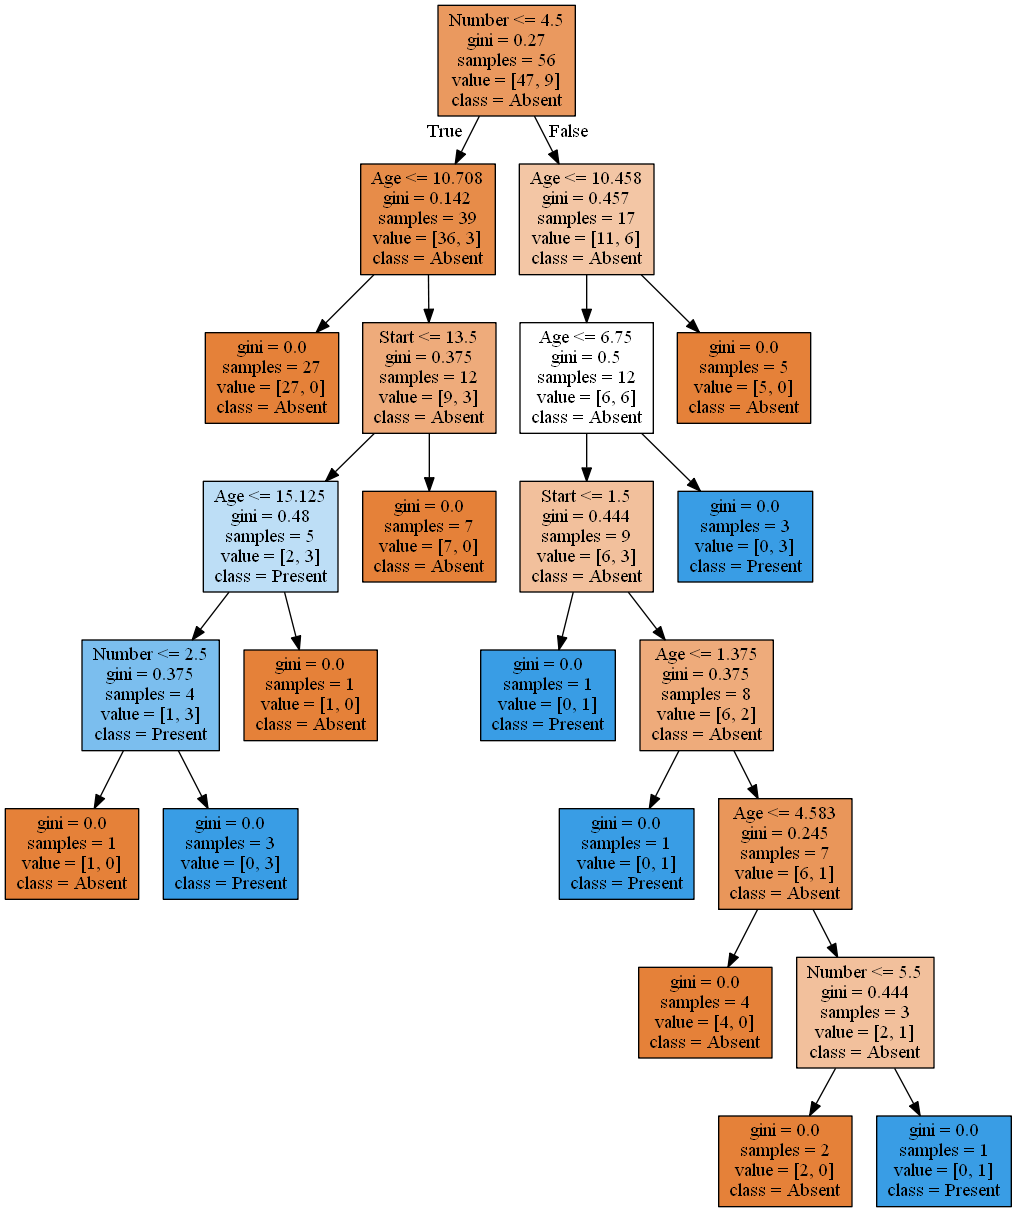

In [24]:
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data) # Show graph

Image(graph.create_png())